<a href="https://colab.research.google.com/github/egfuakye-resources08/Machine-LearningTips/blob/main/Covulutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import keras
from sklearn import datasets
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from numpy.core.function_base import linspace
from numpy.core.function_base import linspace
from keras.utils.np_utils import to_categorical
import random
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model

In [3]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
num_of_samples=[]

(60000, 28, 28)
(10000, 28, 28)


In [5]:
cols = 5
num_classes = 10

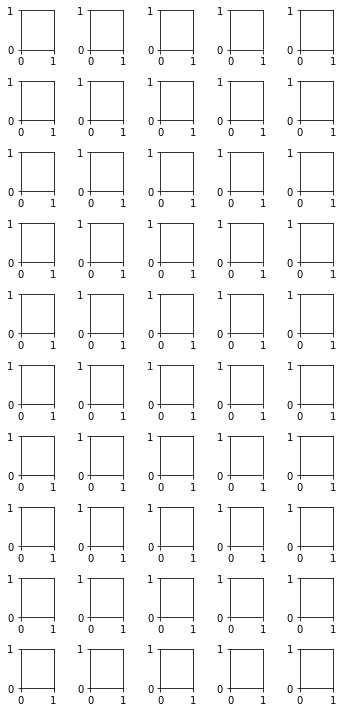

In [6]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


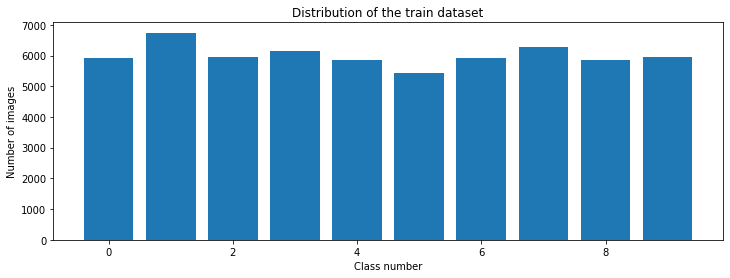

In [7]:
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/10
135/135 [==============================] - 13s 21ms/step - loss: 0.2343 - accuracy: 0.9270 - val_loss: 0.0492 - val_accuracy: 0.9860
Epoch 2/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0758 - accuracy: 0.9769 - val_loss: 0.0534 - val_accuracy: 0.9835
Epoch 3/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0500 - val_accuracy: 0.9855
Epoch 4/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 5/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 6/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 7/10
135/135 [==============================] - 3s 19ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0379 - val_accuracy: 

Text(0.5, 0, 'epoch')

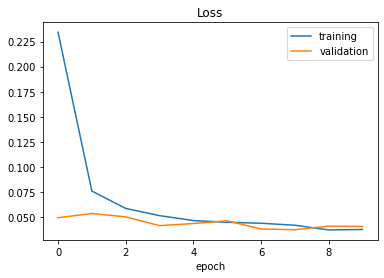

In [9]:
X_train = X_train/255
X_test = X_test/255
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  #Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = leNet_model()
print(model.summary())
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

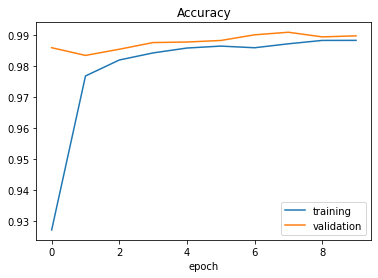

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)

In [13]:
print('Test score:', score[0])
print('Test accuracy:', score[1])
#predict internet number
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

Test score: 0.04238595440983772
Test accuracy: 0.9883000254631042


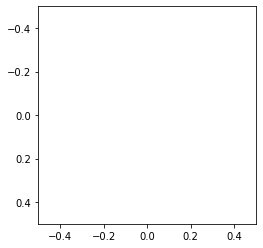

In [26]:
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

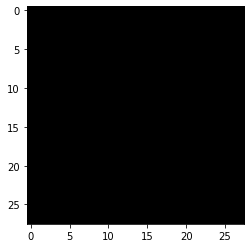

In [27]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [31]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)


(1, 28, 28, 1)


In [32]:
print(img.shape)
#print("predicted digit: "+str(model.predict_classes(img)))

(1, 28, 28, 1)


In [33]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [34]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

In [35]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


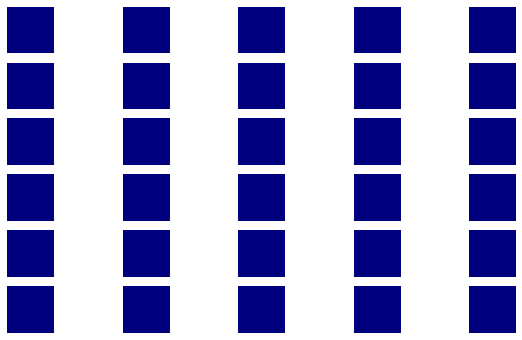

In [36]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

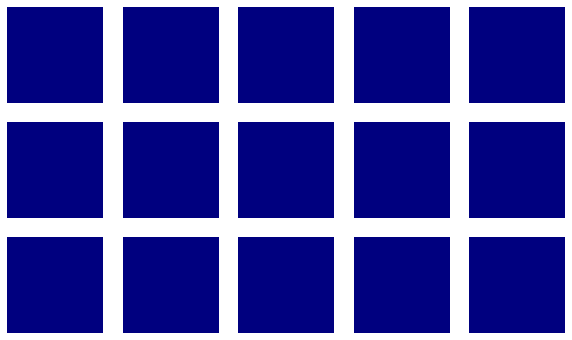

In [37]:

#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')